In [1]:
import numpy as np
from scipy import integrate as intg 
from scipy import optimize as opt
from matplotlib import pyplot as plt 
import time 
import BQPDynamics as bqp

plt.rcParams['font.size']=14
plt.rcParams['text.usetex']=True

saveFigs = False 
figDir = "../figures/"

In [2]:
### These convert to physical SI uits for a given set up parameters 
Tc = 14.8 ### Tc in Kelvin 
vF = 6.e5 ### Fermi velocity in units of m/s

K = 1./Tc ### This is 1K in units where Tc is one
GHz = K/20.84 ### This is 1GHz in units where Tc is one 
ps = 1./GHz ### This is 1 ps in units where Tc is one 

nm = 1.e3*ps/vF ### This is 1 nm in units where vF = Tc = 1 

BCS_ratio = 1.765387449618725 ### This is the ratio between Delta(0) and Tc approximately 

In [26]:
T = 0.01
nQs = 30
Qs = np.linspace(3.4,3.6,nQs)

gaps = np.zeros_like(Qs)
Js = np.zeros_like(Qs)

In [27]:
ntheta = 400
nxi = 10000
cutoffs = [50.,100.,200.]
gaps = np.zeros((nQs))
Js = np.zeros((nQs))

/home/jcurtis/Projects/NoneqBQP/src/BQPDynamics.py:94: RuntimeWarning: overflow encountered in exp
  return 1./(np.exp(self.BQP_doppler(gap,Q)/T) + 1. )


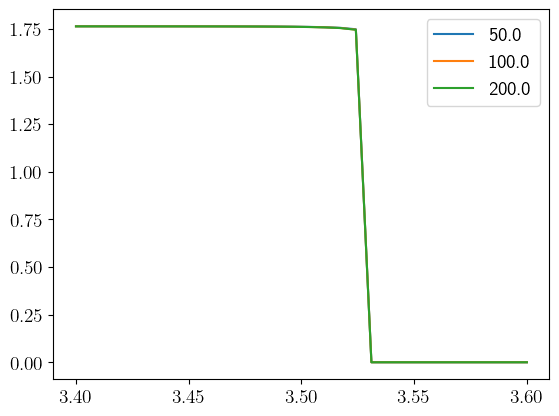

In [28]:
for cutoff in cutoffs:
    sim = bqp.BQPDynamics(nxi,ntheta,cutoff)
    sim.set_s_wave()
    
    for j in range(nQs):
        Q = [Qs[j],0.]
        gaps[j] = sim.solve_gap_eq(Q,T)
        Js[j]= sim.calc_current( sim.eq_nks(gaps[j],Q,T),Q )[0]
    
    plt.plot(Qs,gaps,label=str(cutoff))
plt.legend()
plt.show()

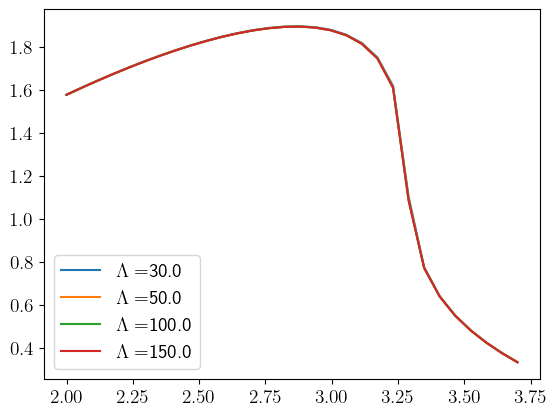

In [92]:
for i in range(len(cutoffs)):
    plt.plot(Qs,Js[i,:],label=r'$\Lambda = $'+str(cutoffs[i]) )

plt.legend()
plt.show()

In [67]:
nthetas = 100
nxis = 10000
cutoff = 100.
gaps = np.zeros((len(nxis),nQs))
Js = np.zeros((len(nxis),nQs))

In [68]:
for i in range(len(nxis)):
    nxi = nxis[i]
    sim = bqp.BQPDynamics(nxi,nthetas,cutoff)
    sim.set_d_wave()

    for j in range(nQs):
        Q = [Qs[j],0.]
        gaps[i,j] = sim.solve_gap_eq(Q,T)
        Js[i,j]= sim.calc_current( sim.eq_nks(gaps[i,j],Q,T),Q )[0]
        

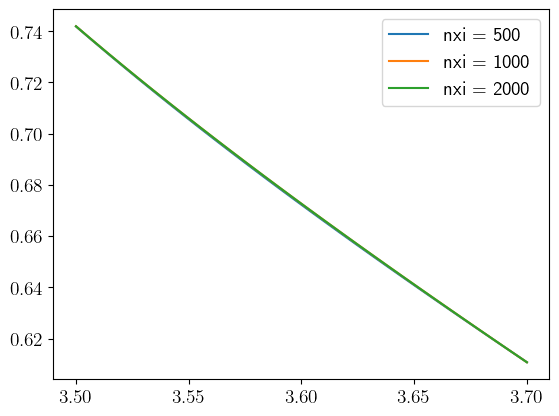

In [69]:
for i in range(len(nxis)):
    plt.plot(Qs,gaps[i,:],label="nxi = {nxi}".format(nxi=nxis[i]))

plt.legend()
plt.show()

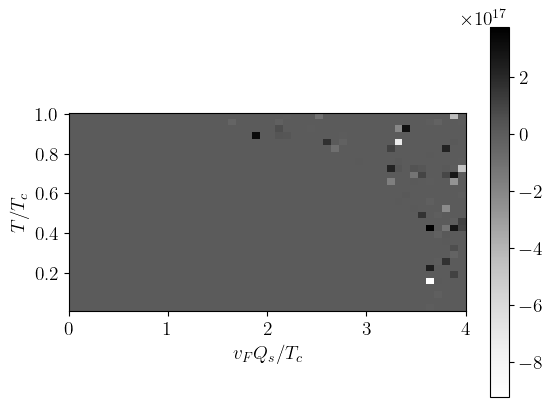

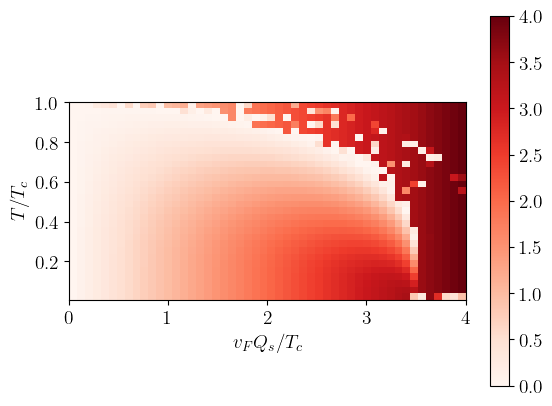

In [12]:
plt.imshow(gap_grid,origin='lower',cmap='Grays',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.colorbar()
plt.show()

plt.imshow(J_grid,origin='lower',cmap='Reds',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.colorbar()
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.show()

In [6]:
for i in range(nTs):
    for j in range(nQs):
        Q = [Qs[j]/np.sqrt(2.),Qs[j]/np.sqrt(2.)]
        gap_grid[i,j] = eq_sim.solve_gap_eq(Q,Ts[i])
        J_grid[i,j] = eq_sim.calc_current( eq_sim.eq_nks(gap_grid[i,j],Q,Ts[i]),Q )[0]

/home/jcurtis/Projects/NoneqBQP/src/BQPDynamics.py:69: RuntimeWarning: overflow encountered in exp
  return 1./(np.exp(self.BQP_doppler(gap,Q)/T) + 1. )


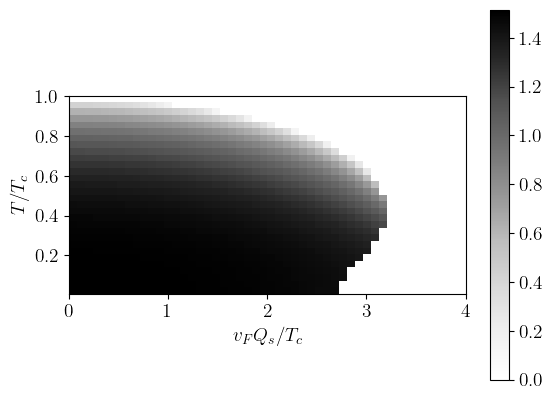

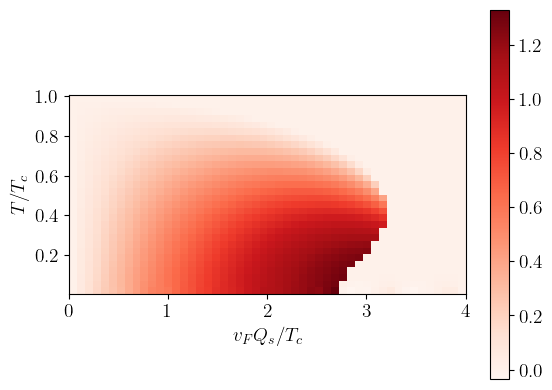

In [7]:
plt.imshow(gap_grid,origin='lower',cmap='Grays',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.colorbar()
plt.show()

plt.imshow(J_grid,origin='lower',cmap='Reds',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.colorbar()
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.show()

In [17]:
tpulse = 0.
FWHM = 1.*ps 
Qmax = 2.*BCS_ratio*4.

def Q_t(t):
    return [ Qmax*np.exp( -np.log(2.)* (t-tpulse)**2/(0.5*FWHM)**2 )/np.sqrt(2.),Qmax*np.exp( -np.log(2.)* (t-tpulse)**2/(0.5*FWHM)**2 )/np.sqrt(2.)]

nts = 151
ts = np.linspace(-5.*ps,5.*ps,nts)

rta_rate = 1./(1*ps)
T0 = 7.*K

td_sim = bqp.BQPDynamics(nxi,nthetas,cutoff)
td_sim.set_d_wave()

gap0 = td_sim.solve_gap_eq([0.,0.],T0)
nks0 = td_sim.eq_nks(gap0,[0.,0.],T0)

In [18]:
nks_vs_t = td_sim.solve_eom(nks0,Q_t,T0,rta_rate,ts)
J_vs_t = td_sim.calc_current(nks_vs_t,Q_t(ts))
gap_vs_t = np.array([ td_sim.solve_gap_nks(nks_vs_t[...,i]) for i in range(nts) ])

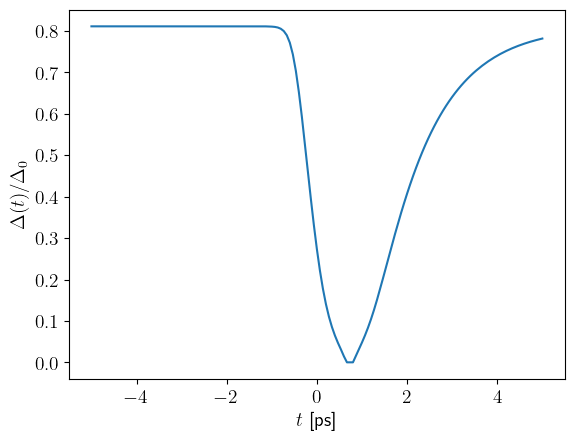

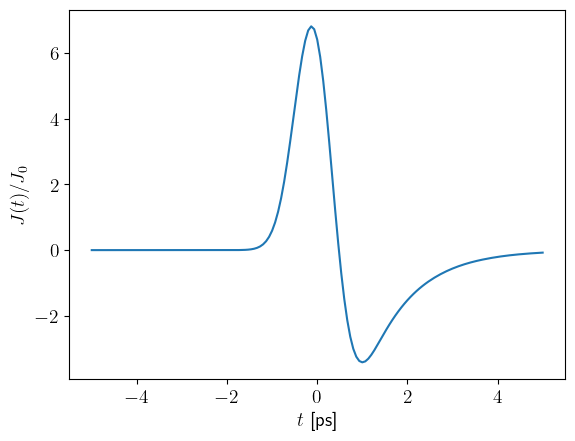

In [19]:
plt.plot(ts/ps,gap_vs_t/BCS_ratio)
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$\Delta(t)/\Delta_0$')
plt.show()

plt.plot(ts/ps,J_vs_t[0])
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$J(t)/J_0$')
plt.show()

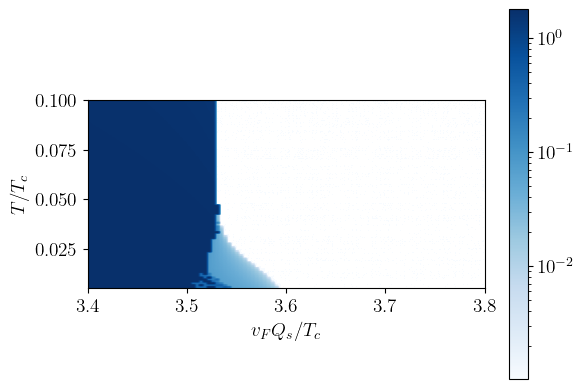

In [158]:
plt.imshow(np.transpose(gaps),origin='lower',cmap='Blues',extent=[Qxs[0],Qxs[-1],Ts[0],Ts[-1]],aspect=2.,norm='log')
plt.xlabel(r'$v_F Q_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.colorbar()
if saveFigs: plt.savefig(figDir+"/gap_vs_T_vs_Q.pdf",bbox_inches='tight')
plt.show()

In [164]:
nTs = 100
Ts = np.linspace(0.005,0.1,nTs)
nQs = 100
Qxs = np.linspace(3.4,3.8,nQs)
gaps = np.zeros((nQs,nTs))
for i in range(nQs):
    for j in range(nTs):
        gaps[i,j] = solve_gap([np.zeros_like(xi_grid),np.zeros_like(xi_grid)],xi_grid)

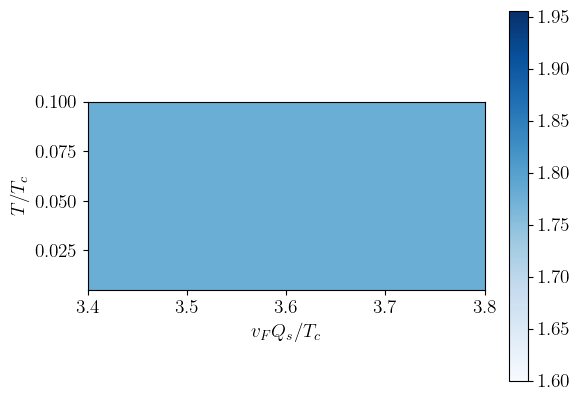

1.7775507122504661


In [166]:
plt.imshow(np.transpose(gaps),origin='lower',cmap='Blues',extent=[Qxs[0],Qxs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.xlabel(r'$v_F Q_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.colorbar()
if saveFigs: plt.savefig(figDir+"/gap_vs_T_vs_Q.pdf",bbox_inches='tight')
plt.show()

In [297]:
xi_grid,theta_grid = momentum_space(200,80,10.)
dxi = xi_grid[1,0] - xi_grid[0,0]
nthetas = xi_grid.shape[1]
T = 1.3
def Q_func_linear(t):
    return [0.3 + 0.*t,0.]

rta_rate = 0.4 ### relaxation time rate for BQP in units of Tc 
nts = 60
times = np.linspace(0.,100.,nts)

gap = solve_gap_eqn_eq(T,Q,xi_grid,theta_grid)
print(gap)
nk0 = [np.zeros_like(xi_grid),np.zeros_like(xi_grid)]

nks_vs_t = solve_bqp_eom_const(nk0,gap,T,Q_func_linear,rta_rate,xi_grid,theta_grid,times)

J_vs_t = compute_current(nks_vs_t,T,Q,xi_grid,theta_grid)

plt.plot(times,J_vs_t[0] )

plt.show()



0.0


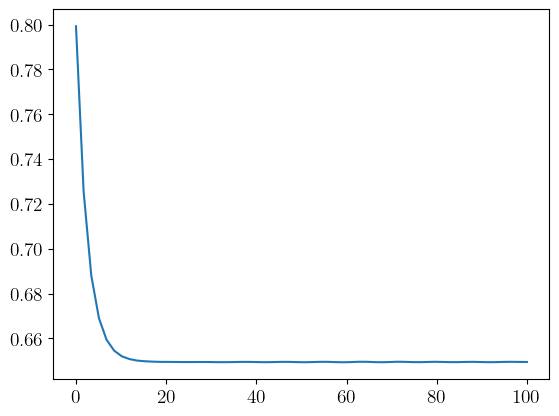

In [298]:
J_vs_t = compute_current(nks_vs_t,T,Q,xi_grid,theta_grid)

plt.plot(times,J_vs_t[0] )

plt.show()



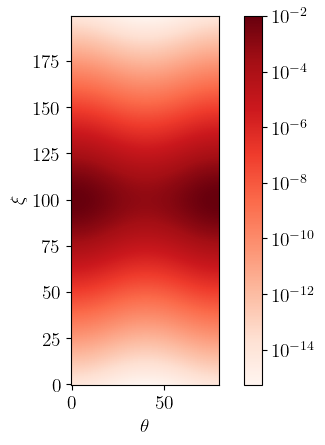

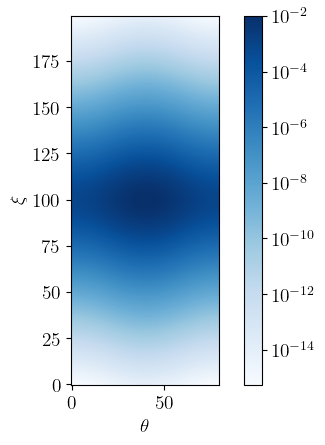

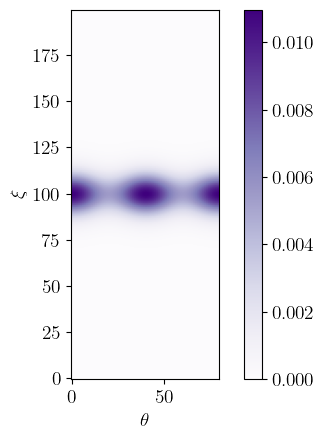

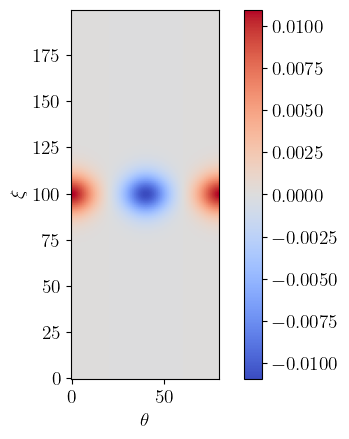

In [238]:
plt.imshow(nks_vs_t[0][:,:,-1] ,origin='lower',norm='log',cmap='Reds')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\xi$')
plt.colorbar()
plt.show()
plt.imshow(nks_vs_t[1][:,:,-1] ,origin='lower',norm='log',cmap='Blues')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\xi$')
plt.colorbar()
plt.show()
plt.imshow(nks_vs_t[0][:,:,-1]+nks_vs_t[1][:,:,-1] ,origin='lower',cmap='Purples')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\xi$')
plt.colorbar()
plt.show()
plt.imshow(( nks_vs_t[0][:,:,-1]+nks_vs_t[1][:,:,-1] )*np.cos(theta_grid),origin='lower',cmap='coolwarm')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\xi$')
plt.colorbar()
plt.show()

In [1]:
import BQPDynamics as bqp
import numpy as np
from scipy import integrate as intg 
from scipy import optimize as opt
from matplotlib import pyplot as plt 
import time 

plt.rcParams['font.size']=14
plt.rcParams['text.usetex']=True

/opt/software/pyenv/202406/versions/3.12.4/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `maxstep`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


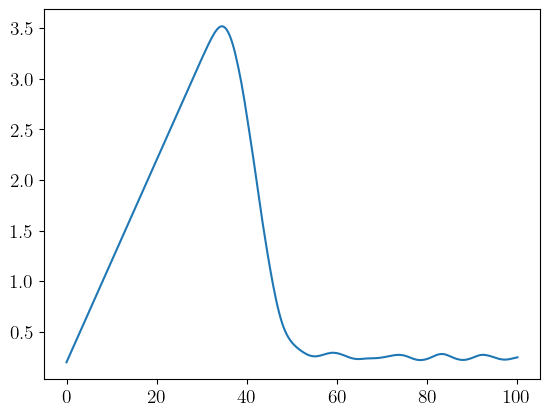

In [2]:
nxi = 100
nthetas = 40
cutoff = 20.
sim = bqp.BQPDynamics(nxi,nthetas,cutoff)

T = .05

def Q_t(t):
    return [0.2 + 0.1*t,0.]

rta_rate = 0.4 ### relaxation time rate for BQP in units of Tc 
nts = 300
times = np.linspace(0.,100.,nts)

gap = sim.solve_gap_eq(Q_t(0),T)
nks0 = sim.eq_nks(gap,Q_t(0),T) 

nks_vs_t = sim.solve_eom(nks0,Q_t,T,rta_rate,times)
J_vs_t = sim.calc_current(sim.nks_vs_t,Q_t(times))
plt.plot(times,J_vs_t[0])
plt.show()


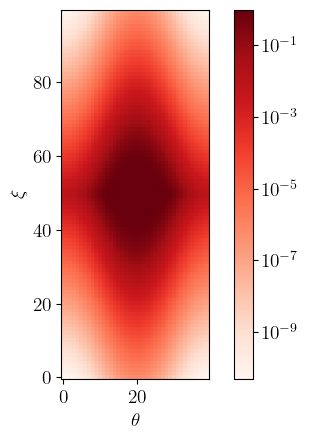

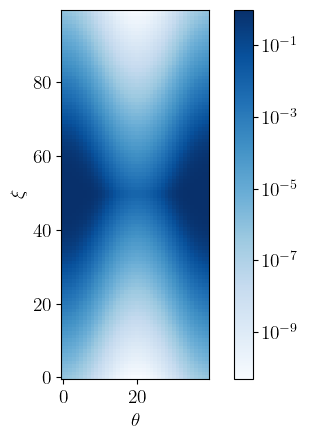

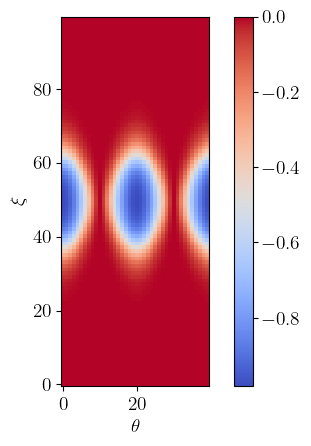

In [3]:
plt.imshow(nks_vs_t[0,:,:,-1] ,origin='lower',norm='log',cmap='Reds')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\xi$')
plt.colorbar()
plt.show()
plt.imshow(nks_vs_t[1,:,:,-1] ,origin='lower',norm='log',cmap='Blues')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\xi$')
plt.colorbar()
plt.show()
plt.imshow(( nks_vs_t[0,:,:,-1]-nks_vs_t[1,:,:,-1] )*np.cos(sim.theta_grid),origin='lower',cmap='coolwarm')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\xi$')
plt.colorbar()
plt.show()

In [5]:
J_vs_t = sim.calc_current(sim.nks_vs_t,Q_t(times))

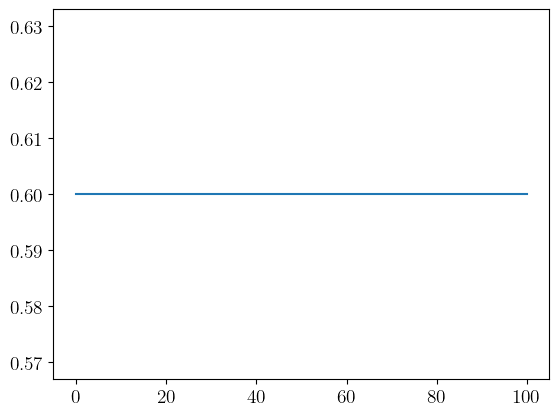

In [6]:
plt.plot(times,J_vs_t[0])
plt.show()